In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import tensorflow as tf
tf.__version__

'1.10.0-dev20180722'

In [3]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

#### Creating First Graph and Running it in a Session

In [9]:
reset_graph()

x = tf.Variable(3, name='x')
y = tf.Variable(4, name='y')
z = x*x*y + y + 2

init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    sess.run(init)
    print(z.eval())

42


#### Linear regression with tensorflow

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
m, n = housing.data.shape

sc = StandardScaler()
scaled_housing_data = sc.fit_transform(housing.data)

scaled_housing_plus_bias = np.c_[np.ones(m), scaled_housing_data]


m, n

(20640, 8)

In [32]:
reset_graph()


X = tf.constant(np.c_[np.ones(m), housing.data], name='X', dtype=tf.float32)
y = tf.constant(housing.target.reshape((-1, 1)), name='y', dtype=tf.float32)

# theta = (XtX)^-1(Xt)(y)
theta = tf.matmul(tf.matrix_inverse(tf.matmul(tf.transpose(X), X)), 
                  tf.matmul(tf.transpose(X), y))

with tf.Session() as sess:
    theta_value = theta.eval()

In [33]:
theta_value

array([[-3.7214844e+01],
       [ 4.3628693e-01],
       [ 9.3908310e-03],
       [-1.0707092e-01],
       [ 6.4462280e-01],
       [-4.0456653e-06],
       [-3.7806034e-03],
       [-4.2373657e-01],
       [-4.3743896e-01]], dtype=float32)

#### Manually Computing the gradient

In [76]:
n_epochs = 1000
eta = .01

reset_graph(77)


X = tf.constant(scaled_housing_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing.target.reshape((-1, 1)), dtype=tf.float32, name='y')

theta = tf.Variable(tf.random_uniform((n+1, 1), minval=-1, maxval=1, seed=42), name='theta')

y_pred = tf.matmul(X, theta, name='predictions')

error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name='mse')

gradient = tf.matmul(tf.transpose(X), error) * 2/m

train_op = tf.assign(theta, theta - eta*gradient)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for i in range(n_epochs):        
        if (i)%100==0:
            print('epoch {}: mse: {:.4f}'.format(i, mse.eval()))
        sess.run(train_op)

    best_theta = theta.eval()

epoch 0: mse: 4.7122
epoch 100: mse: 0.6957
epoch 200: mse: 0.5984
epoch 300: mse: 0.5782
epoch 400: mse: 0.5647
epoch 500: mse: 0.5547
epoch 600: mse: 0.5473
epoch 700: mse: 0.5417
epoch 800: mse: 0.5376
epoch 900: mse: 0.5345


In [77]:
best_theta

array([[ 2.06855226e+00],
       [ 7.22149849e-01],
       [ 1.24052376e-01],
       [-1.48775494e-02],
       [ 7.74962232e-02],
       [-1.18005706e-03],
       [-3.74831147e-02],
       [-9.62158740e-01],
       [-9.18003082e-01]], dtype=float32)

#### Using autodiff

In [78]:
reset_graph()

n_epochs = 1000
eta = .01

X = tf.constant(scaled_housing_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing.target.reshape((-1, 1)), dtype=tf.float32, name='y')

theta = tf.Variable(tf.random_uniform((n+1, 1), -1., 1., seed=42), name='theta')

y_pred = tf.matmul(X, theta, name='predictions')

error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name='mse')

gradient = tf.gradients(mse, [theta])[0]

train_op = tf.assign(theta, theta - eta*gradient)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for i in range(n_epochs):        
        if (i)%100==0:
            print('epoch {}: mse: {:.4f}'.format(i, mse.eval()))
        sess.run(train_op)

    best_theta = theta.eval()

epoch 0: mse: 9.1615
epoch 100: mse: 0.7145
epoch 200: mse: 0.5667
epoch 300: mse: 0.5556
epoch 400: mse: 0.5488
epoch 500: mse: 0.5436
epoch 600: mse: 0.5396
epoch 700: mse: 0.5365
epoch 800: mse: 0.5341
epoch 900: mse: 0.5321


In [79]:
best_theta

array([[ 2.0685523 ],
       [ 0.8874027 ],
       [ 0.14401656],
       [-0.3477088 ],
       [ 0.36178365],
       [ 0.00393811],
       [-0.04269556],
       [-0.66145283],
       [-0.6375278 ]], dtype=float32)

#### using momentum optimizer

In [15]:
n_epochs = 1000
eta = .01

reset_graph()

X = tf.constant(scaled_housing_plus_bias, dtype='float32', name='X')
y = tf.constant(housing.target.reshape((-1, 1)), dtype='float32', name='y')

theta = tf.Variable(tf.random_uniform((n+1, 1), -1.0, 1.0), name='weights')

y_pred = tf.matmul(X, theta, name='predictions')

error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name='mse')

optimizer = tf.train.MomentumOptimizer(learning_rate=eta, momentum=.9)

training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(n_epochs):
        
        if i%100 == 0:
            print("epoch {}: mse {:.4f}".format(i, sess.run(mse)))
        sess.run(training_op)
        
    best_theta = sess.run(theta)

epoch 0: mse 12.4080
epoch 100: mse 0.5252
epoch 200: mse 0.5243
epoch 300: mse 0.5243
epoch 400: mse 0.5243
epoch 500: mse 0.5243
epoch 600: mse 0.5243
epoch 700: mse 0.5243
epoch 800: mse 0.5243
epoch 900: mse 0.5243


In [16]:
best_theta

array([[ 2.068558  ],
       [ 0.8296181 ],
       [ 0.11875138],
       [-0.26552483],
       [ 0.30569458],
       [-0.00450308],
       [-0.03932621],
       [-0.89988863],
       [-0.87054384]], dtype=float32)

#### feeding data to the training process

In [60]:
def fetch_batch(epoch, batch_idx, batch_size):
    np.random.seed(epoch*n_batch + batch_idx)
    idx = np.random.randint(0, m, size=batch_size)
    return scaled_housing_plus_bias[idx], housing.target.reshape((-1, 1))[idx]




In [20]:
reset_graph()

n_epochs = 10
eta = .01
batch_size = 100
n_batch = int(np.ceil(m/batch_size))

X = tf.placeholder(dtype=tf.float32, shape=(None, n+1), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')

theta = tf.Variable(tf.random_uniform((n+1, 1), -1., 1.), name='theta')

y_pred = tf.matmul(X, theta, name='prediction')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

optim = tf.train.GradientDescentOptimizer(learning_rate=eta)

train_op = optim.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch in range(n_batch):
            X_batch, y_batch = fetch_batch(epoch, batch, batch_size)
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        best_theta = theta.eval()

print('best theta:\n{}'.format(best_theta))

best theta:
[[ 2.0550535 ]
 [ 0.827505  ]
 [ 0.12687908]
 [-0.248157  ]
 [ 0.3397136 ]
 [-0.00387797]
 [-0.04134053]
 [-0.8941899 ]
 [-0.87260014]]


#### Saving and Restoring Models

In [27]:
reset_graph()

n_epochs = 1000
eta = .01

X = tf.constant(scaled_housing_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing.target.reshape((-1, 1)), dtype=tf.float32, name='y')

theta = tf.Variable(tf.random_uniform((n+1, 1), -1., 1.), name='theta')

y_pred = tf.matmul(X, theta, name='prediction')

error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

optim = tf.train.GradientDescentOptimizer(eta)
train_op = optim.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            save_path = saver.save(sess, '/tmp/my_model.ckpt')
        
        sess.run(train_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, '/tmp/final_model.ckpt')

In [28]:
best_theta

array([[ 2.0685523e+00],
       [ 8.1063598e-01],
       [ 1.2685774e-01],
       [-2.0784084e-01],
       [ 2.4839848e-01],
       [-1.3083928e-03],
       [-3.9607048e-02],
       [-8.5861272e-01],
       [-8.2600278e-01]], dtype=float32)

In [47]:
save_path

'/tmp/final_model.ckpt'

In [29]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    theta_save = sess.run(theta)
    
print(theta_save)

INFO:tensorflow:Restoring parameters from /tmp/final_model.ckpt
[[ 2.0685523e+00]
 [ 8.1063598e-01]
 [ 1.2685774e-01]
 [-2.0784084e-01]
 [ 2.4839848e-01]
 [-1.3083928e-03]
 [-3.9607048e-02]
 [-8.5861272e-01]
 [-8.2600278e-01]]


In [46]:
reset_graph()

# reconstruct the graph
saver = tf.train.import_meta_graph(save_path + '.meta')

g = tf.get_default_graph()
theta = g.get_tensor_by_name('theta:0')

with tf.Session() as sess:
    # restore variable state
    saver.restore(sess, save_path)
    
    print(theta.eval())

INFO:tensorflow:Restoring parameters from /tmp/final_model.ckpt
[[ 2.0685523e+00]
 [ 8.1063598e-01]
 [ 1.2685774e-01]
 [-2.0784084e-01]
 [ 2.4839848e-01]
 [-1.3083928e-03]
 [-3.9607048e-02]
 [-8.5861272e-01]
 [-8.2600278e-01]]


#### Using TensorBoard

In [48]:
# always use new log directory for different model
from datetime import datetime

In [61]:
now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
root_logdir = 'tf_logs'
logdir = "{}/run-{}/".format(root_logdir, now)

print(logdir)

n_epochs = 1000
eta = .01
batch_size = 100
n_batch = int(np.ceil(m/batch_size))

reset_graph()

g = tf.Graph()
with g.as_default():

    X = tf.placeholder(shape=(None, n+1), dtype=tf.float32, name='X')
    y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='y')

    theta = tf.Variable(tf.random_uniform((n+1, 1), -1., 1.), name='theta')

    y_pred = tf.matmul(X, theta, name='prediction')

    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name='mse')

    optim = tf.train.GradientDescentOptimizer(eta)
    train_op = optim.minimize(mse)

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
    # for recording training progression
    mse_summary = tf.summary.scalar('MSE', mse)
    file_writer = tf.summary.FileWriter(logdir, graph=g)
    

tf_logs/run-20180805075131/


In [62]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_idx in range(n_batch):
            X_batch, y_batch = fetch_batch(epoch, batch_idx, batch_size)
            
            if batch_idx % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X:X_batch, y:y_batch})
                step = epoch*n_batch + batch_idx
                file_writer.add_summary(summary_str, step)
            
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
            
    best_theta = theta.eval()
    
    
file_writer.close()

In [ ]:
# activate deep_learning env
# go to directory that has logdir folder
# run python -m tensorboard.main --logdir="{logdir_name}"

#### Name Scopes

In [67]:
# to group related nodes under the same name scope
eta = .01
n_epochs = 10
batch_size = 100
n_batch = int(np.ceil(m/batch_size))

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
logdir = "{}/{}/".format(root_logdir, now)

reset_graph()

g = tf.Graph()
with g.as_default():
    
    X = tf.placeholder(shape=(None, n+1), dtype=tf.float32, name='X')
    y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='y')
    
    theta = tf.Variable(tf.random_uniform((n+1, 1), -1., 1.), name='theta')
    
    y_pred = tf.matmul(X, theta, name='prediction')
    
    with tf.name_scope('loss') as scope:
        error = y_pred - y
        mse = tf.reduce_mean(tf.square(error), name='mse')
        
    optim = tf.train.GradientDescentOptimizer(eta)
    train_op = optim.minimize(mse)
    
    init = tf.global_variables_initializer()
    
    mse_summary = tf.summary.scalar('MSE', mse)
    file_writer = tf.summary.FileWriter(logdir, graph=g)
    
    
    
with tf.Session(graph=g) as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_idx in range(n_batch):
            x_batch, y_batch = fetch_batch(epoch, batch_idx, batch_size)
            
            if batch_idx%10==0:
                summary_str = mse_summary.eval(feed_dict={X:x_batch, y:y_batch})
                step = epoch*n_batch + batch_idx
                file_writer.add_summary(summary_str, step)
            
            sess.run(train_op, feed_dict={X:x_batch, y:y_batch})
            
    best_theta = theta.eval()
    
file_writer.close()

In [69]:
logdir

'tf_logs/20180805083621/'

In [68]:
best_theta

array([[ 2.0702631 ],
       [ 0.851317  ],
       [ 0.12008709],
       [-0.28977212],
       [ 0.36668813],
       [ 0.00371597],
       [-0.01169568],
       [-0.8651085 ],
       [-0.8327053 ]], dtype=float32)

In [74]:
error.op.name, mse.op.name

('loss/sub', 'loss/mse')

In [71]:
theta.op.name

'theta'

#### Modularity

In [88]:
reset_graph()


def relu(X):
    with tf.name_scope('relu'):
        w_shape = int(X.get_shape()[1]), 1
        w = tf.Variable(tf.random_uniform(w_shape, -1., 1.), dtype=tf.float32, name='weights')
        b = tf.Variable(0, name='bias', dtype=tf.float32)
        z = tf.add(tf.matmul(X, w), b, name='z')
        return tf.maximum(z, 0, name='relu')

In [89]:
reset_graph()

X = tf.placeholder(shape=(None, 3), dtype=tf.float32, name='X')
relus = [relu(X) for _ in range(5)]
output = tf.add_n(relus, name='output')

file_writer = tf.summary.FileWriter('tf_logs/5relus/', graph=tf.get_default_graph())
file_writer.close()

In [94]:
reset_graph()

def relu2(X):
    with tf.variable_scope('relu', reuse=True):
        threshold = tf.get_variable('threshold', shape=(), 
                                    initializer=tf.constant_initializer(0.0))
        w_shape = int(X.get_shape()[1]), 1
        w = tf.Variable(tf.random_uniform(w_shape, -1., 1.), name='weights')
        b = tf.Variable(0, name='bias', dtype=tf.float32)
        z = tf.add(tf.matmul(X, w), b, name='z')
        return tf.maximum(z, threshold, name='relu')

In [96]:
reset_graph()
with tf.variable_scope('relu'):
    threshold = tf.get_variable('threshold', shape=(), 
                                initializer=tf.constant_initializer(0.0))

X = tf.placeholder(dtype=tf.float32, shape=(None, 3), name='X')
relus = [relu2(X) for _ in range(5)]
output = tf.add_n(relus, name='output')


file_writer = tf.summary.FileWriter('tf_logs/relu2/', graph=tf.get_default_graph())
file_writer.close()

In [99]:
reset_graph()

def relu3(X):
    threshold = tf.get_variable('threshold', shape=(), 
                                initializer=tf.constant_initializer(0.0))
    w_shape = int(X.get_shape()[1]), 1
    w = tf.Variable(tf.random_uniform(w_shape, -1., 1.), name='weights')
    b = tf.Variable(0.0, dtype=tf.float32, name='bias')
    z = tf.add(tf.matmul(X, w), b, name='z')
    return tf.maximum(z, threshold, name='relu')


X = tf.placeholder(dtype=tf.float32, shape=(None, 3), name='X')
relus = []
for i in range(5):
    with tf.variable_scope('relu', reuse=i>0):
        relus.append(relu3(X))
output = tf.add_n(relus, name='output')

file_writer = tf.summary.FileWriter('tf_logs/relu3/', tf.get_default_graph())
file_writer.close()

#### toy graph: forward-mode autodiff

In [114]:

class Const:
    def __init__(self, value):
        self.value = value
        
    def evaluate(self):
        return self.value
    
    def __str__(self):
        return str(self.value)
    
    def gradients(self, var):
        return Const(0)

class Var:
    def __init__(self, name, init_value=0.0):
        self.name = name
        self.value = init_value
        
    def evaluate(self):
        return self.value
    
    def __str__(self):
        return str(self.name)
    
    def gradients(self, var):
        if self is var:
            return Const(1)
        else:
            return Const(0)
    
    
class BinaryOp:
    def __init__(self, a, b):
        self.a = a
        self.b = b

class Add(BinaryOp):
    
    def evaluate(self):
        return self.a.evaluate() + self.b.evaluate()
    
    def gradients(self, var):
        return Add(self.a.gradients(var), self.b.gradients(var))
    
    def __str__(self):
        return "{} + {}".format(self.a, self.b)

class Mul(BinaryOp):
    
    def evaluate(self):
        return self.a.evaluate() * self.b.evaluate()
    
    def gradients(self, var):
        return Add(Mul(self.b, self.a.gradients(var)), Mul(self.a, self.b.gradients(var)))
    
    def __str__(self):
        return "{} * {}".format(self.a, self.b)

In [115]:
# f:x^2*y + y + 2
# x=3, y=4

x = Var('x', init_value=3.0)
y = Var('y', init_value=4.0)
f = Add(Mul(x, Mul(x, y)), Add(y, Const(2.0)))

In [117]:
str(f)

'x * x * y + y + 2.0'

In [118]:
dfdx = f.gradients(x)
dfdy = f.gradients(y)

In [120]:
dfdx.evaluate(), dfdy.evaluate()

(24.0, 10.0)

In [121]:
d2fdxdx = dfdx.gradients(x)
d2fdxdy = dfdx.gradients(y)
d2fdydx = dfdy.gradients(x)
d2fdydy = dfdy.gradients(y)

In [123]:
d2fdxdx.evaluate(), d2fdxdy.evaluate()

(8.0, 6.0)

In [124]:
d2fdydx.evaluate(), d2fdydy.evaluate()

(6.0, 0.0)

In [132]:
class DualNumber:
    
    def __init__(self, value=0.0, eps=0.0):
        self.value = value
        self.eps = eps
        
    def __add__(self, other):
        return DualNumber(self.value + self.to_dual(other).value,
                          self.eps + self.to_dual(other).eps)
    
    def __radd__(self, other):
        return self.to_dual(other).__add__(self)
    
    def __mul__(self, other):
        return DualNumber(self.value * self.to_dual(other).value,
                          self.value*self.to_dual(other).eps + self.eps*self.to_dual(other).value)
    
    def __rmul__(self, other):
        return self.to_dual(other).__mul__(self)
        
    def __str__(self):
        if self.eps:
            return "{:.1f} + {:.1f}ε".format(self.value, self.eps)
        else:
            return "{:.1f}".format(self.value)
        
    def __repr__(self):
        return str(self)
    
    @classmethod
    def to_dual(cls, number):
        if isinstance(number, cls):
            return number
        else:
            return cls(number)

In [133]:
d = DualNumber()
e = DualNumber(1, 2)
g = DualNumber(2, 2)

In [127]:
d

0.0

In [130]:
e, g

(1.0 + 2.0ε, 2.0 + 2.0ε)

In [134]:
d + e

1.0 + 2.0ε

In [135]:
d * e

0.0

In [142]:
e * 1, 1*e

(1.0 + 2.0ε, 1.0 + 2.0ε)

In [141]:
e + 1, 1 + e

(2.0 + 2.0ε, 2.0 + 2.0ε)

In [138]:
e + g

3.0 + 4.0ε

In [139]:
e * g

2.0 + 6.0ε

In [140]:
1 + e

2.0 + 2.0ε

In [144]:
x.value = DualNumber(3.0)
y.value = DualNumber(4.0)

f.evaluate()

42.0

In [145]:
x.value = DualNumber(3.0, 1.0)
f.evaluate().eps    # dfdx

24.0

In [146]:
x.value = DualNumber(3.0)
y.value = DualNumber(4.0, 1.0)
f.evaluate().eps    # dfdy

10.0

In [167]:
class Const:
    def __init__(self, value):
        self.value = value
        
    def evaluate(self):
        return self.value
    
    def backpropagation(self, gradient):
        return None
    
    def __str__(self):
        return str(self.value)
    
    
class Var:
    def __init__(self, name, value=0):
        self.name = name
        self.value = value
        self.gradient = 0
        
    def evaluate(self):
        return self.value
    
    def backpropagation(self, gradient):
        self.gradient += gradient
        
    def __str__(self):
        return self.name
    

class BinaryOperation:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
class Add(BinaryOperation):
    
    def evaluate(self):
        self.value = self.a.evaluate() + self.b.evaluate()
        return self.value
        
    def backpropagation(self, gradient):
        self.a.backpropagation(gradient)
        self.b.backpropagation(gradient)
        
    def __str__(self):
        return "{} + {}".format(str(self.a), str(self.b))
    
class Mul(BinaryOperation):
    def evaluate(self):
        self.value = self.a.evaluate() * self.b.evaluate()
        return self.value
    
    def backpropagation(self, gradient):
        self.a.backpropagation(gradient*self.b.value)
        self.b.backpropagation(gradient*self.a.value)
        
    def __str__(self):
        return "({}) * ({})".format(str(self.a), str(self.b))

In [168]:
x = Var("x", value=3)
y = Var("y", value=4)
f = Add(Mul(Mul(x, x), y), Add(y, Const(2))) # f(x,y) = x²y + y + 2

result = f.evaluate()
result

42

In [169]:
str(f)

'((x) * (x)) * (y) + y + 2'

In [164]:
f.backpropagation(1.0)

In [165]:
x.gradient, y.gradient

(24.0, 10.0)

#### Ex.12
#### 12. Logistic Regression with Mini-Batch Gradient Descent using TensorFlow

In [170]:
from sklearn.datasets import make_moons

In [175]:
m = 1000
X_moon, y_moon = make_moons(n_samples=m, noise=.1, random_state=42)

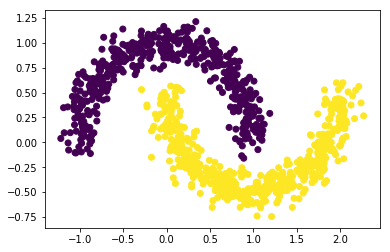

In [176]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon)

In [183]:
X_moon_with_bias = np.c_[np.ones(len(X_moon)), X_moon]
y_moon = y_moon.reshape((-1, 1))
X_moon_with_bias.shape, y_moon.shape

((1000, 3), (1000, 1))

In [179]:
X_moon_with_bias

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       ...,
       [ 1.        ,  1.68425911, -0.34822268],
       [ 1.        , -0.9672013 ,  0.26367208],
       [ 1.        ,  0.78758971,  0.61660945]])

In [194]:
test_size = .2
n_test = int(test_size * m)

X_moon_train = X_moon_with_bias[:-n_test]
y_moon_train = y_moon[:-n_test]
X_moon_test = X_moon_with_bias[-n_test:]
y_moon_test = y_moon[-n_test:]

X_moon_train.shape, y_moon_train.shape, X_moon_test.shape, y_moon_test.shape

((800, 3), (800, 1), (200, 3), (200, 1))

In [182]:
def random_batch(X, y, batch_size):
    idx = np.random.permutation(len(X))[:batch_size]
    return X[idx], y[idx]

In [191]:
reset_graph()
input_dim = 2
eps = 1e-7
eta = .01

X = tf.placeholder(dtype=tf.float32, shape=(None, input_dim+1), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y') 

w_shape = input_dim+1, 1
w = tf.Variable(tf.random_uniform(w_shape, -1., 1.), name='weights')
b = tf.Variable(0.0, dtype=tf.float32, name='bias')

logit = tf.add(tf.matmul(X, w), b)
y_proba = 1./(1. + tf.exp(-logit))

cost = -tf.reduce_mean(y*tf.log(y_proba+eps) + (1-y)*tf.log(1-y_proba+eps))

optim = tf.train.GradientDescentOptimizer(eta)
train_op = optim.minimize(cost)

init = tf.global_variables_initializer()


# add saver => 
# add summary => tensorboard
# name variable scope appropriately


In [195]:
n_epochs = 1000
batch_size = 50
n_batch = int(np.ceil(m/batch_size))

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for batch in range(n_batch):
            X_batch, y_batch = random_batch(X_moon_train, y_moon_train, batch_size)
            sess.run(train_op, feed_dict={X:X_batch, y:y_batch})
        
        if (epoch % 100) == 0:
            print('epoch {:2d}: loss: {:.4f}'.format(epoch, sess.run(cost,feed_dict={X:X_batch, y:y_batch})))
            
    best_w, best_b = sess.run([w, b])
    
    y_pred = sess.run(y_proba, feed_dict={X:X_moon_test, y:y_moon_test})

epoch  0: loss: 0.7135
epoch 100: loss: 0.3386
epoch 200: loss: 0.2212
epoch 300: loss: 0.3152
epoch 400: loss: 0.3728
epoch 500: loss: 0.2103
epoch 600: loss: 0.2031
epoch 700: loss: 0.2714
epoch 800: loss: 0.2421
epoch 900: loss: 0.2633


In [193]:
best_w, best_b

(array([[-0.12807973],
        [ 1.1938304 ],
        [-5.071616  ]], dtype=float32), 0.8194999)

In [197]:
((y_pred > .5) == y_moon_test).mean()

0.875



Now let's start over, but this time we will add all the bells and whistles, as listed in the exercise:

* Define the graph within a logistic_regression() function that can be reused easily.
* Save checkpoints using a Saver at regular intervals during training, and save the final model at the end of training.
* Restore the last checkpoint upon startup if training was interrupted.
* Define the graph using nice scopes so the graph looks good in TensorBoard.
* Add summaries to visualize the learning curves in TensorBoard.
* Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at the shape of the learning curve.



In [202]:
X_moon_poly_train = np.c_[X_moon_train, X_moon_train[:, 1:]**2, X_moon_train[:, 1:]**3]
X_moon_poly_test = np.c_[X_moon_test, X_moon_test[:, 1:]**2, X_moon_test[:, 1:]**3]

X_moon_poly_train.shape, X_moon_poly_test.shape

((800, 7), (200, 7))

In [203]:
X_moon_poly_train

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01, ...,
         1.97312424e-01, -1.36349734e-04,  8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01, ...,
         1.76182639e-01,  1.09915879e+00, -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01, ...,
         6.49368582e-02,  6.53727646e-01, -1.65476722e-02],
       ...,
       [ 1.00000000e+00,  1.26427820e+00, -5.03589882e-01, ...,
         2.53602769e-01,  2.02082148e+00, -1.27711789e-01],
       [ 1.00000000e+00,  4.22418073e-01, -3.90690735e-01, ...,
         1.52639250e-01,  7.53750255e-02, -5.96347407e-02],
       [ 1.00000000e+00,  1.61017834e+00, -1.79753906e-01, ...,
         3.23114669e-02,  4.17466800e+00, -5.80811239e-03]])

In [205]:
reset_graph()


def logistic_regression(X, y, learning_rate=.01, random_state=None):
    
    with tf.name_scope('logistic_regression'):
        # build model
        with tf.name_scope('model'):
            theta = tf.Variable(tf.random_uniform((int(X.get_shape()[1]), 1), -1., 1., seed=random_state), 
                                name='theta')
            logits = tf.matmul(X, theta, name='logits')
            y_proba = tf.sigmoid(logits, name='y_proba')

        # train model
        with tf.name_scope('train'):
            loss = tf.losses.log_loss(y, y_proba, scope='loss')
            optim = tf.train.GradientDescentOptimizer(learning_rate)
            training_op = optim.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        # init variable
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
        # save model
        with tf.name_scope('save'):
            saver = tf.train.Saver()
            
    return y_proba, loss, training_op, loss_summary, init, saver

In [214]:
from datetime import datetime
import os

In [209]:
def make_logdir(prefix=''):
    base = 'tf_logs/'
    if prefix:
        prefix += '-'
    when = 'run-' + datetime.utcnow().strftime('%Y%m%d%H%M%S') + '/'
    return base + prefix + when

In [212]:
lr_logdir = make_logdir('logreg')
lr_logdir

'tf_logs/logreg-run-20180809080415/'

In [213]:
reset_graph()
n_dim = X_moon_poly_train.shape[1]

X = tf.placeholder(shape=(None, n_dim), dtype=tf.float32, name='X')
y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='y')

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y, random_state=42)

file_writer = tf.summary.FileWriter(lr_logdir, graph=tf.get_default_graph())

In [218]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(len(X_moon_poly_train)/batch_size))

checkpoint_path = 'tmp/my_logreg_model.ckpt'
checkpoint_epoch = checkpoint_path + '.epoch'
final_path = './my_logreg_model'

with tf.Session() as sess:
    
    # check if re-train from current epoch
    if os.path.isfile(checkpoint_epoch):
        
        with open(checkpoint_epoch, 'r') as f:
            start_epoch = int(f.read())
            print('Restart training from {} epoch'.format(start_epoch))
        saver.restore(sess, checkpoint_path)
    else:
        print('Start a new training')
        start_epoch = 0
        sess.run(init)
    
    for epoch in range(start_epoch, n_epochs):
        for batch in range(n_batches):
            X_batch, y_batch = random_batch(X_moon_poly_train, y_moon_train, batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        
        loss_val, loss_str = sess.run([loss, loss_summary], 
                                      feed_dict={X:X_moon_poly_test, y:y_moon_test})
        file_writer.add_summary(loss_str, global_step=epoch)
        
        # save checkpoint every 500 epochs
        if epoch%500 == 0:
            print("Epoch {}: Loss {:.4f}".format(epoch+1, loss_val))
            saver.save(sess, checkpoint_path, global_step=epoch)
            with open(checkpoint_epoch, 'w') as f:
                f.write(str(epoch+1))
                
    print("Finish training.")
    saver.save(sess, final_path, global_step=epoch)
    os.remove(checkpoint_epoch)
    
    y_prob_pred = sess.run(y_proba, feed_dict={X:X_moon_poly_test, y:y_moon_test})

Start a new training
Epoch 1: Loss 0.6326
Epoch 501: Loss 0.1756
Epoch 1001: Loss 0.1320
Epoch 1501: Loss 0.1089
Epoch 2001: Loss 0.0941
Epoch 2501: Loss 0.0837
Epoch 3001: Loss 0.0760
Epoch 3501: Loss 0.0701
Epoch 4001: Loss 0.0653
Epoch 4501: Loss 0.0614
Epoch 5001: Loss 0.0580
Epoch 5501: Loss 0.0552
Epoch 6001: Loss 0.0528
Epoch 6501: Loss 0.0507
Epoch 7001: Loss 0.0489
Epoch 7501: Loss 0.0472
Epoch 8001: Loss 0.0458
Epoch 8501: Loss 0.0444
Epoch 9001: Loss 0.0432
Epoch 9501: Loss 0.0422
Epoch 10001: Loss 0.0412
Finish training.=


In [220]:
((y_prob_pred >= 0.5) == y_moon_test).mean()

0.98

In [225]:
y_pred = (y_prob_pred >= 0.5).astype(int).ravel()

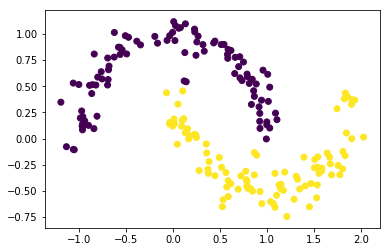

In [226]:
plt.scatter(X_moon_test[:, 1], X_moon_test[:, 2], c=y_pred)

In [234]:
from scipy.stats import reciprocal
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [238]:
n_search = 10
n_dim = X_moon_poly_train.shape[1]
n_epochs = 10000

for i in range(n_search):
    
    # init random parameter
    #np.random.seed()
    eta = reciprocal(.0001, .1).rvs()
    batch_size = np.random.randint(1, 100)
    logdir = make_logdir('logreg')
    final_model_path = './my_logreg_model_{}'.format(i)
    
    print("Iteration:", i+1)
    print("logdir: {}".format(logdir))
    print("batch size: {}".format(batch_size))
    print("learning rate: {:.4f}".format(eta))
    print("training: ", end='')
    
    # build model
    reset_graph(seed=i)
    X = tf.placeholder(shape=(None, n_dim), dtype=tf.float32, name='X')
    y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='y')
    
    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y, learning_rate=eta, random_state=i)
    file_write = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())
    
    # training
    n_batch = int(np.ceil(len(X_moon_poly_train)/batch_size))
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(n_epochs):
            for batch_idx in range(n_batches):
                X_batch, y_batch = random_batch(X_moon_poly_train, y_moon_train, batch_size)
                sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            
            loss_str = sess.run(loss_summary, feed_dict={X:X_moon_poly_test, y:y_moon_test})
            file_writer.add_summary(loss_str, global_step=epoch)
            if epoch % 500 == 0:
                print('.', end='')
        
        # final evaluation
        y_proba_pred = sess.run(y_proba, feed_dict={X:X_moon_poly_test})
        y_pred = (y_prob_pred >= 0.5).ravel()
        
        print()
        print("precision: {:.4f}".format(precision_score(y_moon_test, y_pred)))
        print("recall: {:.4f}".format(recall_score(y_moon_test, y_pred)))
        print('accuracy: {:.4f}'.format(accuracy_score(y_moon_test, y_pred)))
        print('--'*20)
        
        # save final model
        saver.save(sess, final_model_path)

Iteration: 1
logdir: tf_logs/logreg-run-20180809122412/
batch size: 83
learning rate: 0.0070
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 2
logdir: tf_logs/logreg-run-20180809122730/
batch size: 2
learning rate: 0.0045
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 3
logdir: tf_logs/logreg-run-20180809123045/
batch size: 47
learning rate: 0.0422
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 4
logdir: tf_logs/logreg-run-20180809123400/
batch size: 4
learning rate: 0.0004
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 5
logdir: tf_logs/logreg-run-20180809123707/
batch size: 85
learning rate: 0.0004
training: ....................
precision: 0.9798


In [240]:
n_search = 10
n_dim = X_moon_poly_train.shape[1]
n_epochs = 10000

for i in range(n_search):
    
    # init random parameter
    #np.random.seed()
    eta = reciprocal(.0001, .1).rvs()
    batch_size = np.random.randint(1, 100)
    logdir = make_logdir('logreg')
    final_model_path = './my_logreg_model_{}'.format(i)
    
    print("Iteration:", i+1)
    print("logdir: {}".format(logdir))
    print("batch size: {}".format(batch_size))
    print("learning rate: {:.4f}".format(eta))
    print("training: ", end='')
    
    # build model
    reset_graph(seed=i)
    X = tf.placeholder(shape=(None, n_dim), dtype=tf.float32, name='X')
    y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='y')
    
    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y, learning_rate=eta, random_state=i)
    file_write = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())
    
    # training
    n_batch = int(np.ceil(len(X_moon_poly_train)/batch_size))
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(n_epochs):
            for batch_idx in range(n_batches):
                X_batch, y_batch = random_batch(X_moon_poly_train, y_moon_train, batch_size)
                sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            
            loss_str = sess.run(loss_summary, feed_dict={X:X_moon_poly_test, y:y_moon_test})
            file_writer.add_summary(loss_str, global_step=epoch)
            if epoch % 500 == 0:
                print('.', end='')
        
        # final evaluation
        y_proba_pred = sess.run(y_proba, feed_dict={X:X_moon_poly_test})
        y_pred = (y_prob_pred >= 0.5).ravel()
        
        print()
        print("precision: {:.4f}".format(precision_score(y_moon_test, y_pred)))
        print("recall: {:.4f}".format(recall_score(y_moon_test, y_pred)))
        print('accuracy: {:.4f}'.format(accuracy_score(y_moon_test, y_pred)))
        print('--'*20)
        
        # save final model
        saver.save(sess, final_model_path)

Iteration: 1
logdir: tf_logs/logreg-run-20180809193716/
batch size: 43
learning rate: 0.0003
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 2
logdir: tf_logs/logreg-run-20180809194036/
batch size: 2
learning rate: 0.0045
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 3
logdir: tf_logs/logreg-run-20180809194354/
batch size: 47
learning rate: 0.0422
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 4
logdir: tf_logs/logreg-run-20180809194712/
batch size: 4
learning rate: 0.0004
training: ....................
precision: 0.9798
recall: 0.9798
accuracy: 0.9800
----------------------------------------
Iteration: 5
logdir: tf_logs/logreg-run-20180809195029/
batch size: 85
learning rate: 0.0004
training: ....................
precision: 0.9798
